# Highlighting data

In [4]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

pollution = pd.read_csv('../data/pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


<Axes: ylabel='CO'>

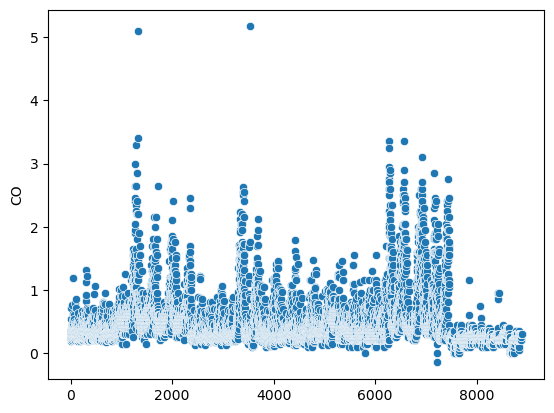

In [7]:
sns.scatterplot(pollution['CO'])

In [8]:
cinci_pollution=pollution[pollution['city']=='Cincinnati']

<Axes: ylabel='CO'>

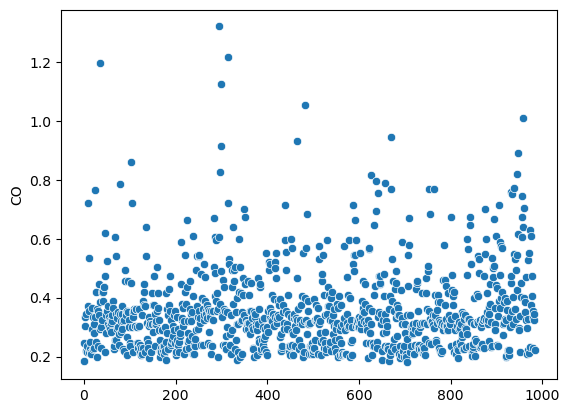

In [11]:
sns.scatterplot(cinci_pollution['CO'])

Lets highlight some data points.

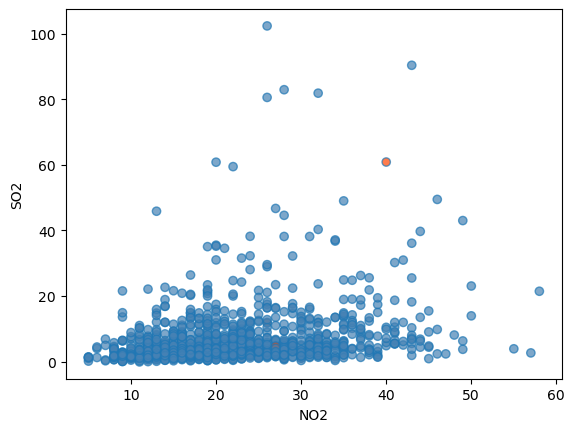

In [12]:
cinci_colors = ['orangered' if day==38 else 'steelblue' for day in cinci_pollution.day] 

p = sns.regplot(x='NO2', 
               y='SO2', 
               data = cinci_pollution, 
               fit_reg=False, 
               scatter_kws={'facecolors':cinci_colors, 'alpha':0.7})

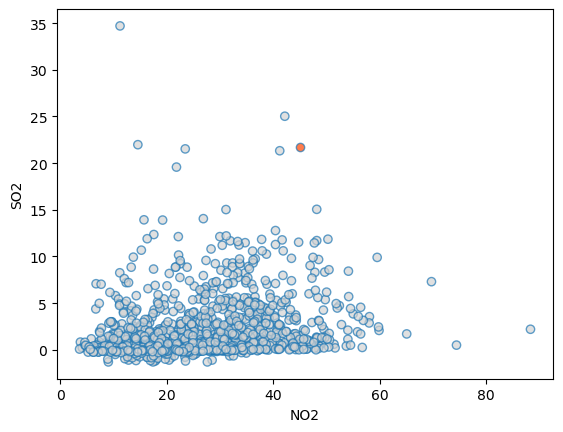

In [13]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

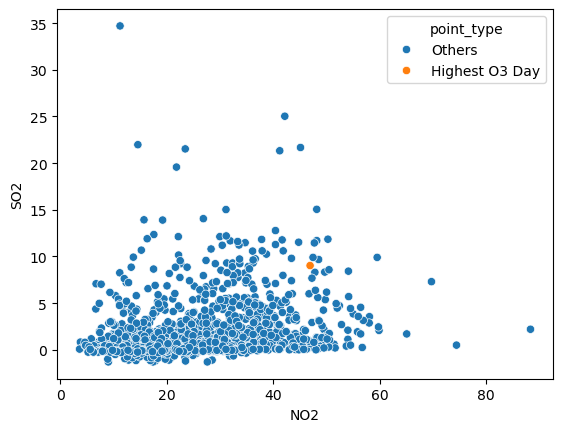

In [14]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

# Comparing groups

In [16]:
sns.set_style('whitegrid')

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/631249230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color='red')
/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/631249230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwasko

<Axes: xlabel='O3', ylabel='Density'>

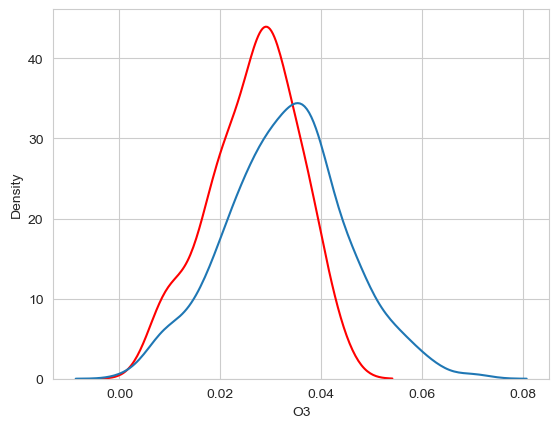

In [19]:
pollution_nov = pollution[pollution['month']==10]
sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color='red')
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/4259468771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color='red', rug=True)
/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/4259468771.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

<Axes: xlabel='O3', ylabel='Density'>

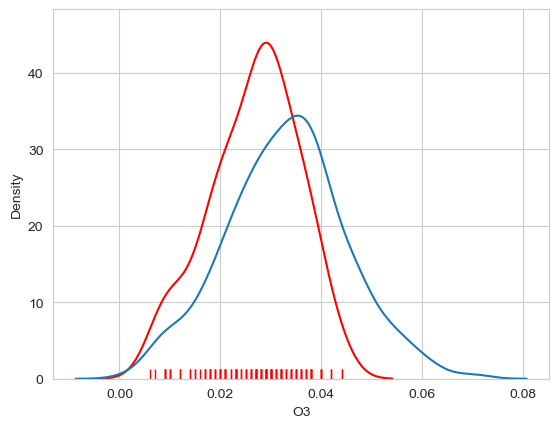

In [20]:
sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color='red', rug=True)
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)

Adding rug=True sns add small dashes corresponding to the datapoints, so their distribution can be better understood

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/1330070281.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pollution[pollution.year == 2012].O3,
/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/1330070281.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pollution[pollution.year != 2012].O3,


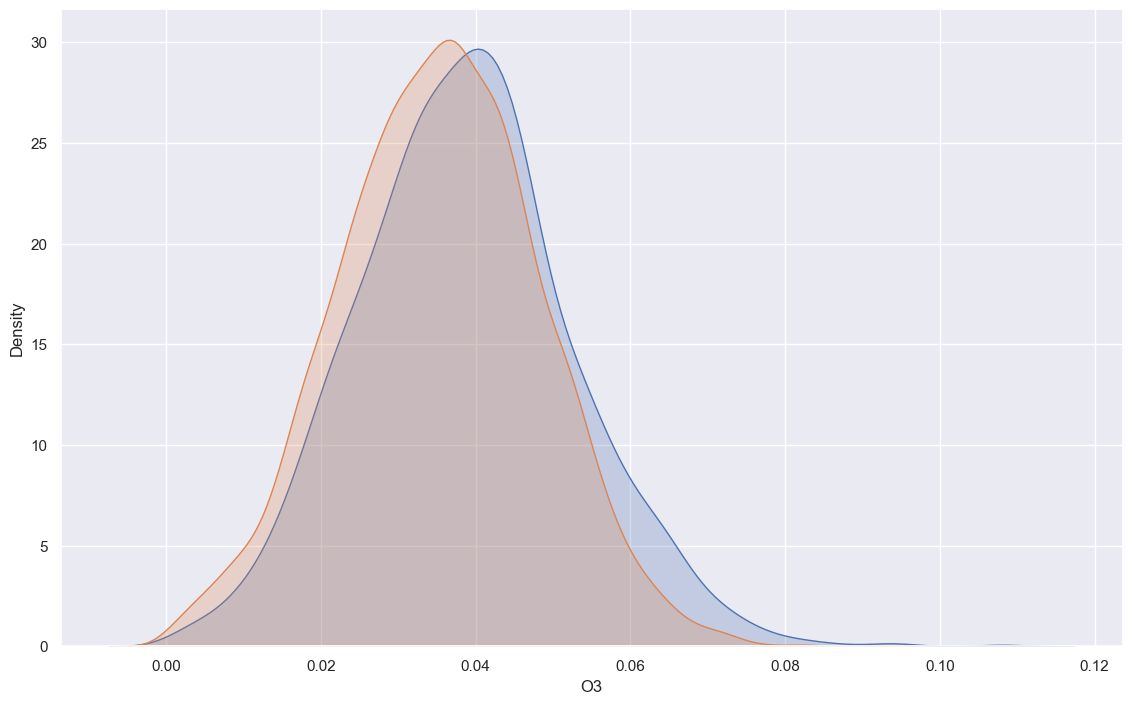

In [30]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/3046649895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3,
/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_10672/3046649895.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

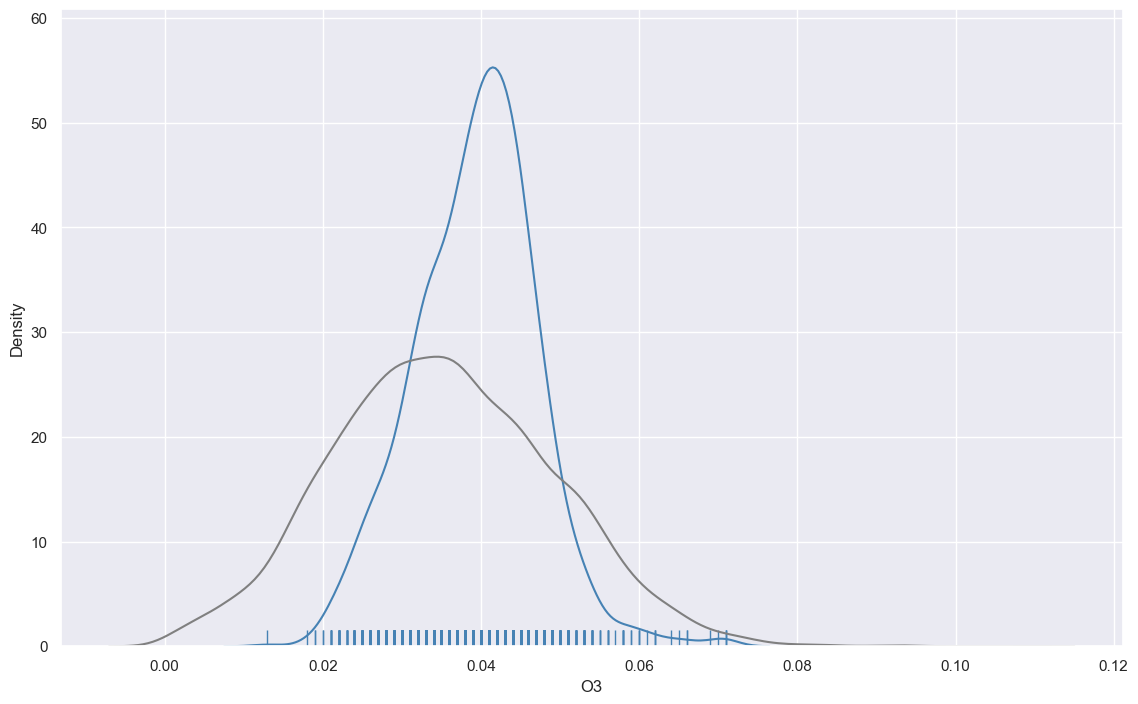

In [31]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn off the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()

# The Beeswarm plot

Better approach to compare the distribution of many groups than the kernel density plot.


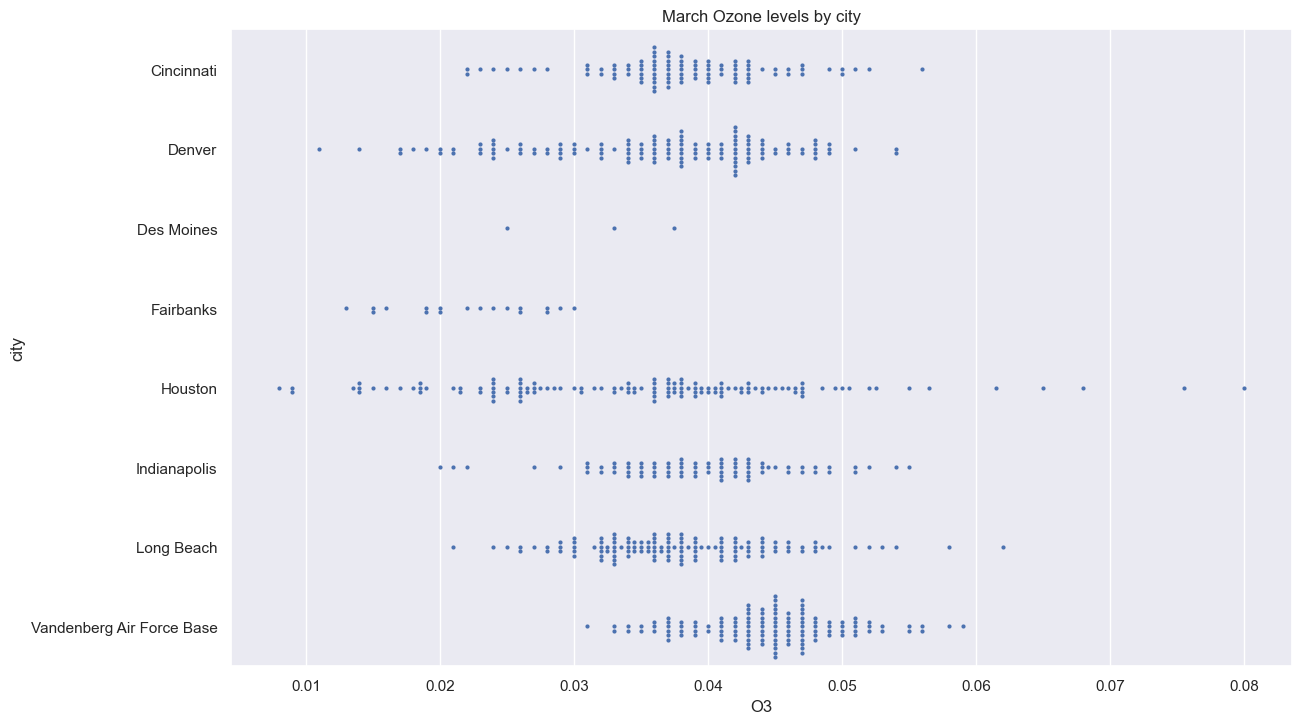

In [32]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

In [22]:
pollution.city.value_counts()

city
Houston                      1433
Vandenberg Air Force Base    1425
Denver                       1389
Long Beach                   1193
Indianapolis                 1137
Cincinnati                    985
Des Moines                    832
Fairbanks                     494
Name: count, dtype: int64

/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='city', ylabel='O3'>

/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


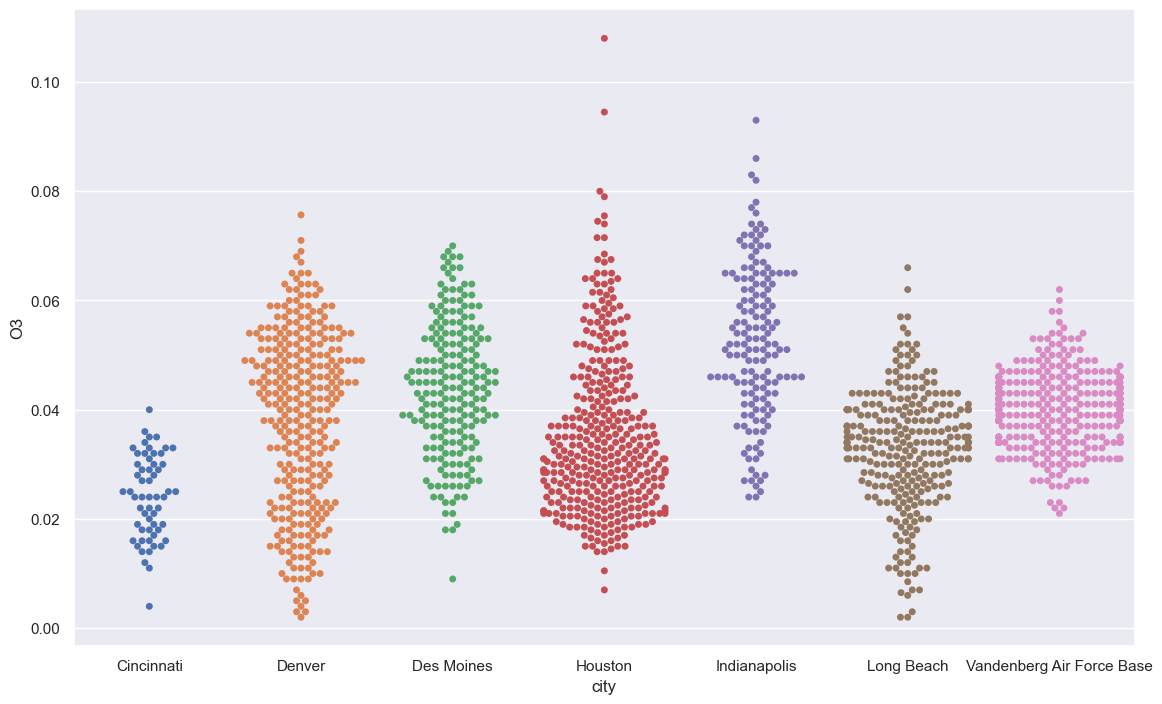

In [27]:
sns.set_theme(rc={'figure.figsize':(13.7,8.27)})

cities=['Houston',
'Vandenberg Air Force Base',
'Denver',
'Long Beach',
'Indianapolis',
'Cincinnati',
'Des Moines']                 

sns.swarmplot(data=pollution[pollution.city.isin(cities) & (pollution.year==2012)], y='O3', x='city', hue='city')

# Annotations 

Annotations are great to add analysis to graphs, but they are time consuming.


Text(13, 33, 'Outlier')

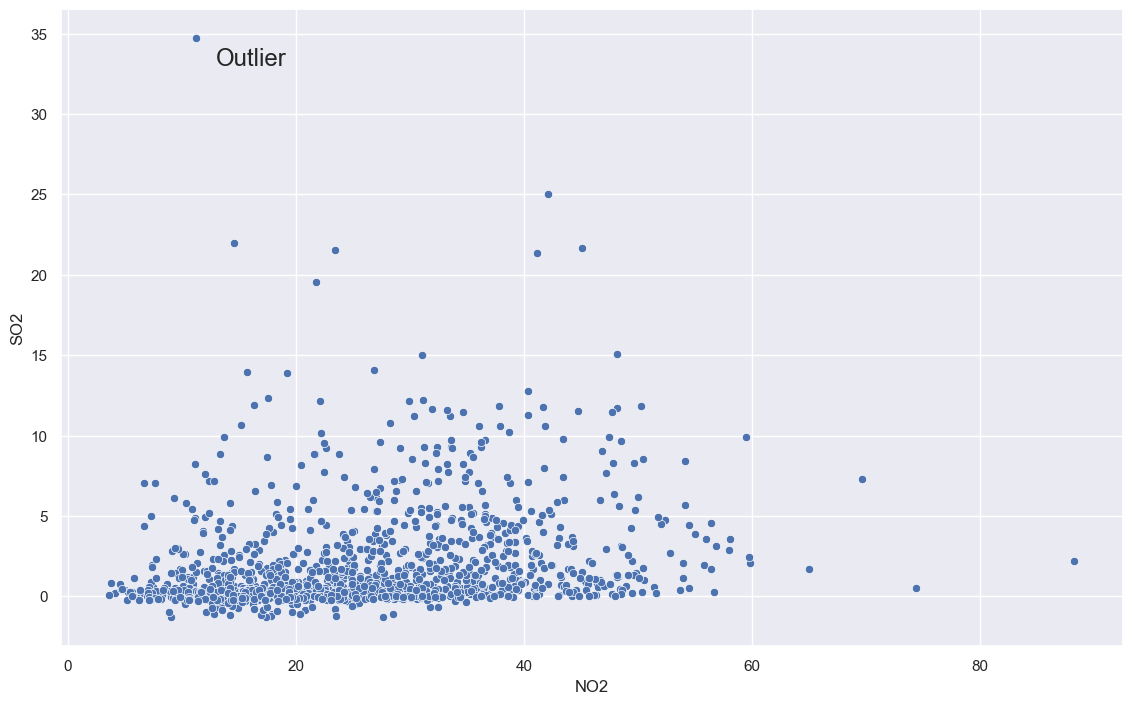

In [33]:
sns.scatterplot(x='NO2', y='SO2', data=houston_pollution)

plt.text(13,33, 'Outlier', 
        fontdict={'ha': 'left', 'size':'x-large'})

Text(60, 22, 'A buried point to look at')

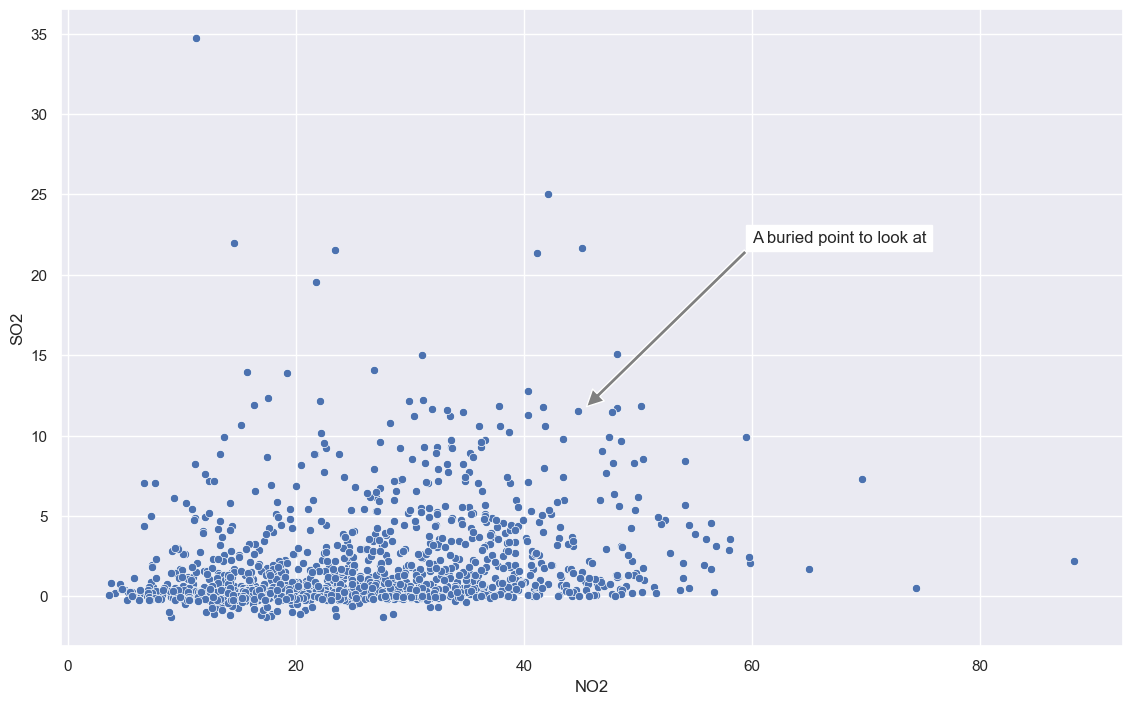

In [34]:
sns.scatterplot(x='NO2', y='SO2', data=houston_pollution) 

plt.annotate('A buried point to look at', xy=(45.5, 11.8), xytext=(60,22), 
            arrowprops={'facecolor':'gray', 'width':3}, backgroundcolor = 'white')
                

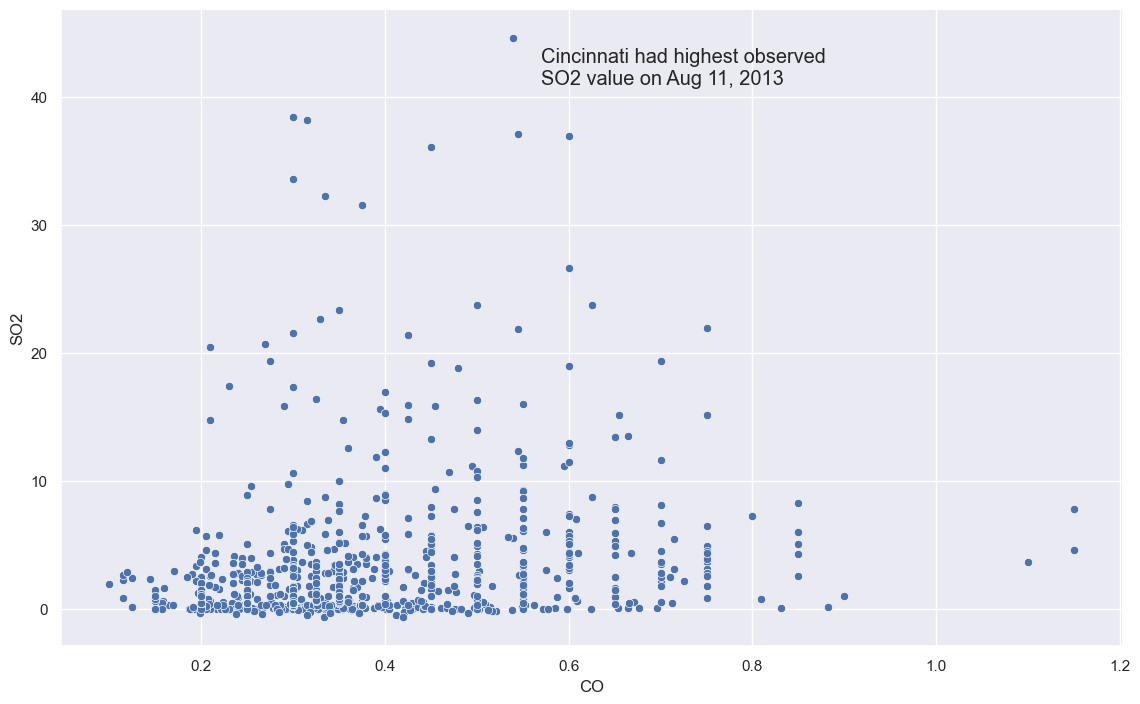

In [35]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/matplotlib/text.py:1465: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/opt/anaconda3/envs/HuggingFace/lib/python3.11/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


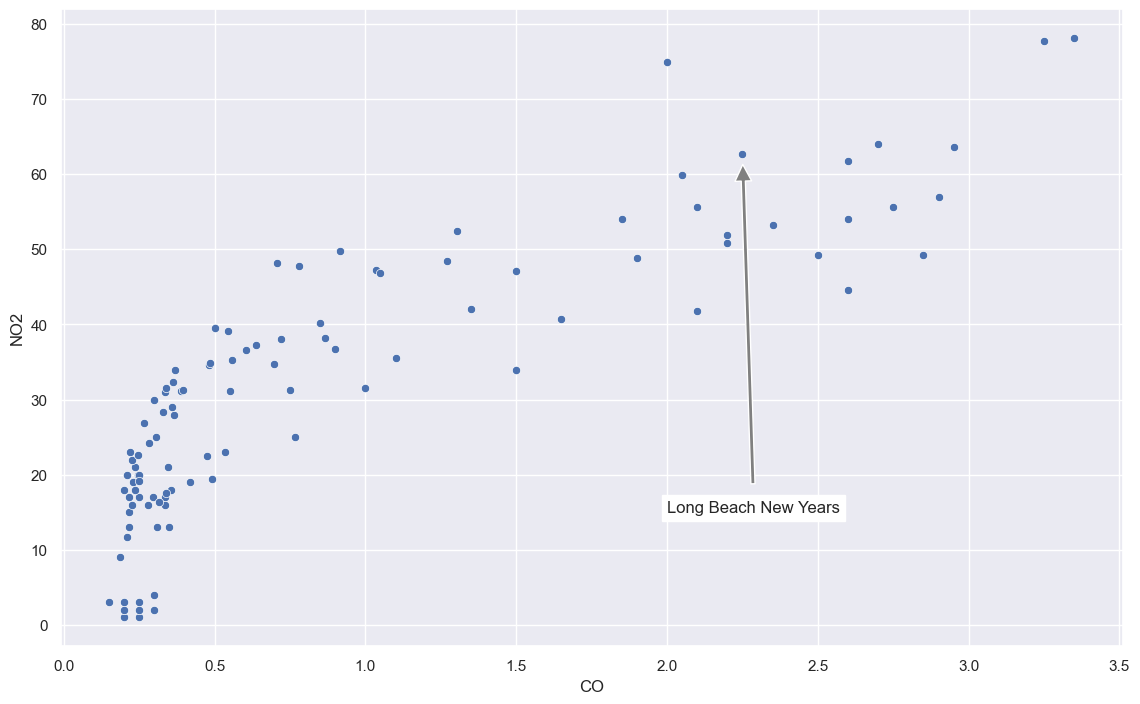

In [36]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()